In [2]:
# importing dependencies
import pandas as pd
import numpy as np
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
import keras
from keras.utils import np_utils

import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas as pd
import matplotlib.pyplot as plt
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.NUMBER,p.OPT.MENTION,p.OPT.HASHTAG)

p.clean('Preprocessor is #awesome 👍 https://github.com/s/preprocessor')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk.stem  as hindi_stemmer


In [2]:
english_stopwords = stopwords.words("english")
with open('final_stopwords.txt', encoding = 'utf-8') as f:
    hindi_stopwords = f.readlines()
    for i in range(len(hindi_stopwords)):
        hindi_stopwords[i] = re.sub('\n','',hindi_stopwords[i])
stopwords = english_stopwords + hindi_stopwords
english_stemmer = SnowballStemmer("english")

In [3]:
sub = pd.read_csv('en_cnn_submission_bt_2021.csv')
sub
s=0
for i in sub['label']:
    if i=='HOF':
        s=s+1
s


878

In [3]:
train1 = pd.read_csv('Datasets/AskFm_datasets.csv')


# train2 = pd.read_excel('dataset/en_hasoc_2020_train.xlsx')

# train3 = pd.read_csv('dataset/en_train_both_bt_es.csv')

# train4 = pd.read_csv('dataset/en_train_both_bt_es1.csv')

# train5 = pd.read_csv('dataset/en_train_2021_wordnet_sense.csv')




# train=[]

# train=pd.concat([train1,train2,train3,train4])

# train=train.dropna()

# test = pd.read_csv('testHateSpeech.csv')

# test1=pd.read_csv('test_h_e_new.csv')

print(len(train1))
# print(len(test))
# print(len(test1))

9998


In [4]:
train1.head()

,posts,label
0,how to tell if a guy is gay if they seem super...,0
1,Idk I'm not gay,0
2,This person is 100% fake so beware Isabella!,1
3,Oof lmao how is she fake? Who's this lmao shit...,1
4,If your loved one left n cut all ties w you sh...,0


In [6]:
train1['text'][7]

'The report on @TheLeadCNN that @clarissaward filed from India regarding the dire COVID catastrophe was absolutely riveting, devastatingly sad...and some of the best and most important reporting you will see. Do not look away. #IndiaCovidCrisis https://t.co/oHsnIXlEla'

In [7]:
x=0
for i in train1['task1']:
#     print(i)
    if i=='HOF':
        x=x+1
print(x)
  

2501


In [8]:
def clean_tweet(tweet):
    tweet = re.sub(r"@[A-Za-z0-9]+",' ', tweet)
    tweet = re.sub(r"https?://[A-Za-z0-9./]+",' ', tweet)
    tweet = re.sub("RT ", " ", tweet)
    tweet = re.sub("\n", " ", tweet)
    tweet=tweet.lower()
#     tweet = re.sub(r" +", " ", tweet)

    tokens = []
#     for token in tweet.split():
#         if token not in stopwords:
# #             token = english_stemmer.stem(token)
#             #token = hindi_stemmer.hi_ste(token)
#             tokens.append(token)
    return tweet

In [9]:

test1['text'] = test1['text'].apply((lambda x: clean_tweet(x)))

# test1['text'] = test1['text'].apply((lambda x: re.sub(r" +",'',x)))



for i in test1['text']:
    print(i)
    


        you are a donkey that's why only one is talking.
vodafone had raised a dog it became very famous then mukesh ambani became fond of it.
for 18-18 hours the termite went and hollowed out a 70 year old strong tree in 7 years !!. #resignmodi  
  in our gram panchayat sidhanv district fatehpur u.p. it is in the condition of ponds that there is no water both animals and people are upset. radha krishna temple has a baba hut near it it is not a pond. is 00103 account no. 129a is yet to hear the government silent public upset  
why doesn't this give me peace? there was only one person where i did #justiceforshahabuddin  
fattu hai bjp wala #cruelmamata #bengalviolence #bengalburning  
    in the kishkindha kand of valmiki ramayana bali has been described in detail it is not mentioned that the monkey is an animal. the monkey was a prosperous society vegetarian and strong. he was well versed in all political theories. he was as strong as dityu!
hindus do not want to make india rich that's

In [10]:
# my_dict1 = { 'id':sub['id'],'text':test1['text'],'label':sub['label']}
# df = pd.DataFrame(my_dict1)
# df
# df.to_csv('En_final_submission_files.csv',index=False)

In [11]:
sub

,id,label
0,60c5d6bf5659ea5e55deffcb,NOT
1,60c5d6bf5659ea5e55df028c,HOF
2,60c5d6bf5659ea5e55def377,HOF
3,60c5d6bf5659ea5e55def4c7,HOF
4,60c5d6bf5659ea5e55df01a6,NOT
...,...,...
1276,60c5d6bf5659ea5e55def74c,HOF
1277,60c5d6bf5659ea5e55df0380,NOT
1278,60c5d6bf5659ea5e55defaeb,HOF
1279,60c5d6bf5659ea5e55df03c3,NOT


In [12]:
# df.to_csv('hi_submission_4.csv',index=False)

In [13]:
train_x= train1['t']

# train_x= train_x.apply((lambda x: clean_tweet(x)))

valid_x= test['Comment']

# valid_x= valid_x.apply((lambda x: clean_tweet(x)))

train_y= train['task1']
# train_y= train_y.apply((lambda x: re.sub('HOF','1',x)))
# train_y = train_y.apply((lambda x: re.sub('NOT','0',x)))
train_y =pd.to_numeric(train_y)


valid_y= test['Hsbinary']

comment=train_x

In [14]:
train_x

0        if you made it through this &amp;&amp; were ...
1      technically that's still turning back the cloc...
2                      and you're the govt?!?! stop t...
3              _yigit soldier of japan who has dick head
4        you'd be better off asking who doesn't think...
                             ...                        
977    a few people labeling liberals asking why they...
978    another tragic incident in karnataka due to th...
979                                                angry
980      i would use the g to buy a little hit &amp; ...
981    the report on the covid crisis in india on glo...
Name: text, Length: 10489, dtype: object

In [15]:
print('train comments length: ',len(train_x))
print('test comments length: ',len(valid_x))

train comments length:  10489
test comments length:  2266


In [16]:
train_y

0      1
1      1
2      0
3      1
4      1
      ..
977    0
978    1
979    1
980    0
981    1
Name: task1, Length: 10489, dtype: int64

In [17]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(comment)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)


# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(comment)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [18]:
# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open('data/wi.vec', encoding="utf8")):
    values = line.split()
    embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')

# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(comment)
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure e
# qual length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)
# test1_seq_x= sequence.pad_sequences(token.texts_to_sequences(test1['text']), maxlen=70)

# create token-embedding mapping
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [19]:
def train_model(classifier, xtrain, ytrain, xvalid, yvalid): 
    # fit the training dataset on the classifier
    classifier.fit(xtrain, ytrain)
    # predict the labels on validation dataset
    predictions = classifier.predict(xvalid)     
    accuracy = metrics.accuracy_score(predictions, yvalid)
    f1score = metrics.f1_score(yvalid, predictions, average='weighted')
    return accuracy, f1score

In [20]:
# Naive Bayes on Word Level TF IDF Vectors
accuracy, f1score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print("NB, WordLevel TF-IDF:   accuracy: %s     f1 score: %s"% (accuracy,f1score))

# Naive Bayes on Character Level TF IDF Vectors
accuracy, f1score = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y)
print("NB, CharLevel Vectors:   accuracy: %s   f1 score: %s"% (accuracy,f1score))

NB, WordLevel TF-IDF:   accuracy: 0.8181818181818182     f1 score: 0.8094882461638854
NB, CharLevel Vectors:   accuracy: 0.7303618711385702   f1 score: 0.7125599692610813


In [21]:
# Linear Classifier on Word Level TF IDF Vectors
accuracy, f1score = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print("LR, WordLevel TF-IDF:   accuracy: %s   f1 score: %s"% (accuracy,f1score))

# Linear Classifier on Character Level TF IDF Vectors
accuracy, f1score = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y)
print("LR, CharLevel Vectors:   accuracy: %s   f1 score: %s"% (accuracy,f1score))

LR, WordLevel TF-IDF:   accuracy: 0.8936451897616946   f1 score: 0.8928154708770988
LR, CharLevel Vectors:   accuracy: 0.8565754633715799   f1 score: 0.8548982149366353


In [22]:
# convert to one_hot
train_y_onehot = keras.utils.np_utils.to_categorical(train_y, 2)
valid_y_onehot = keras.utils.np_utils.to_categorical(valid_y, 2)

In [23]:
def cnn(xtrain, ytrain, xvalid, yvalid, epochs = 10):
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(2, activation="softmax")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    model.fit(xtrain, ytrain,
              batch_size=256,
              epochs=epochs)
    predictions = model.predict(xvalid)
    predictions = predictions.argmax(axis=-1)
    
    p = model.predict(valid_seq_x)
    p = p.argmax(axis=-1)
    
    accuracy = model.evaluate(xvalid, yvalid, verbose=0)
    f1score = metrics.f1_score(valid_y, predictions, average='weighted')
    return accuracy, f1score, p

In [24]:
# test1_seq_x

In [25]:
accuracy, f1score , p= cnn(train_seq_x, train_y_onehot, valid_seq_x, valid_y_onehot)
print("CNN, Word Embeddings acuuracy accuracy:%s     f1 score: %s"% (accuracy[1], f1score))


Epoch 1/10
41/41 [==============================] - 21s 61ms/step - loss: 0.6797 - accuracy: 0.5758
Epoch 2/10
41/41 [==============================] - 2s 59ms/step - loss: 0.4933 - accuracy: 0.7678
Epoch 3/10
41/41 [==============================] - 2s 57ms/step - loss: 0.4405 - accuracy: 0.8042
Epoch 4/10
41/41 [==============================] - 2s 61ms/step - loss: 0.4067 - accuracy: 0.8232
Epoch 5/10
41/41 [==============================] - 2s 59ms/step - loss: 0.3895 - accuracy: 0.8368
Epoch 6/10
41/41 [==============================] - 2s 58ms/step - loss: 0.3655 - accuracy: 0.8502
Epoch 7/10
41/41 [==============================] - 2s 57ms/step - loss: 0.3476 - accuracy: 0.8528
Epoch 8/10
41/41 [==============================] - 2s 57ms/step - loss: 0.3234 - accuracy: 0.8645
Epoch 9/10
41/41 [==============================] - 2s 59ms/step - loss: 0.2799 - accuracy: 0.8933
Epoch 10/10
41/41 [==============================] - 2s 59ms/step - loss: 0.2453 - accuracy: 0.9139
CNN, Wor

In [26]:
# CNN, Word Embeddings acuuracy accuracy:0.8481906652450562     f1 score: 0.8470922208855135
# hindi CNN, Word Embeddings acuuracy accuracy:0.7584331035614014     f1 score: 0.7548526218036159    

# CNN, Word Embeddings acuuracy accuracy:0.8120035529136658     f1 score: 0.8089558945723596 2021
# CNN, Word Embeddings acuuracy accuracy:0.8976169228553772     f1 score: 0.8977694027672622 2021-220
# CNN, Word Embeddings acuuracy accuracy:0.9263018369674683     f1 score: 0.925569807896066 2021-220 augment bt
# CNN, Word Embeddings acuuracy accuracy:0.9638128876686096     f1 score: 0.9636509764957553 augment data

In [52]:
print(p)
len(p)

for i in range(100):

[0 1 1 ... 0 1 0]


2266

In [67]:
valid_x.head(100)

0       : ugh hes owning the carpet as usual, nobody...
1                             shame on   #bengalburning
2       : miami cubans got some fucking nerve voting...
3       all it does is bring in $$$$$$$$$$&amp;&amp;...
4         wah   , yet another masterstroke. people w...
                            ...                        
95        if you want to build something in the long...
96    watch this dude pull all sorts of crazy pussy ...
97    they were so babie and now they're all growned up
98      all them goofy niccas watching that shit. if...
99      : damn i was tryna masturbate and my rheumat...
Name: Comment, Length: 100, dtype: object

In [73]:
my_dict1 = { 'text':valid_x.head(200),'label':valid_y.head(200),'predict':p[:200]}
df = pd.DataFrame(my_dict1)
df

,text,label,predict
0,": ugh hes owning the carpet as usual, nobody...",0,0
1,shame on #bengalburning,1,1
2,: miami cubans got some fucking nerve voting...,1,1
3,all it does is bring in $$$$$$$$$$&amp;&amp;...,1,1
4,"wah , yet another masterstroke. people w...",1,1
...,...,...,...
195,stop setting her up damn,1,1
196,"inb4 you snap back at me for ""bootlicking jaco...",1,1
197,_y i-i won't go in there either,0,0
198,": i need friends who wanna smoke weed , go g...",0,0


In [78]:
x=0
for i in range(len(df['text'])):
    print(df['text'][i],df['label'][i],df['predict'][i])
    if df['label'][i]==1:
        x=x+1
print(x)

  : ugh hes owning the carpet as usual, nobody else could ever 0 0
shame on   #bengalburning 1 1
  : miami cubans got some fucking nerve voting for stricter immigration when their ass was allowed to wash up ashore no questi 1 1
  all it does is bring in $$$$$$$$$$&amp;&amp;&amp;$$$$$fucker does not believe it 1 1
    wah   , yet another masterstroke. people will die and to burn the dead, they would need more wood. superb. #resignmodi #modimadedisater stop destroying the country. stop destroying the planet. #modihataodeshbachao 1 1
"always remember humans just because you pay for more gas or have ( humans, them dumb motherfuckers who think there better pay for more gas and have more ). silly fuckin humans shut up you ain't better you just got more money motherfucker tho"#humans #nope 1 1
  : turning point usa's field director said "i hate blacks ... like fuck them all." their spokeswoman said hitler wouldn't have 1 1
  bloody hell! that tree is a living thing! 1 1
  __: me getting my sh

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_true = [0, 0, 1, 1, 0, 0,0,0]
y_pred = [0, 0, 1, 1, 0, 1,0,0]
confusion_matrix(y_true, y_pred)


array([[5, 1],
       [0, 2]], dtype=int64)

In [53]:
valid_y
x=0
for i in valid_y:
    if i==1:
        x=x+1
print(x)
    

1329


     NOT   HOF
NOT  828   260
HOF   47  1314


<AxesSubplot:>

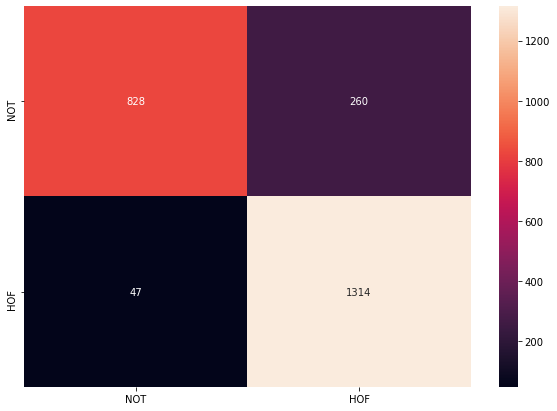

In [63]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_true, y_pred)
array=[[ 828,  260],[  47, 1314]]
df_cm = pd.DataFrame(array, index = [i for i in ["NOT",'HOF']],
                  columns = [i for i in ["NOT",'HOF']])

print(df_cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt='g')

In [28]:
# l=[]
# ids=[]
# x=0
# for i in range(len(p)):
#     if p[i]==0:
#         l.append('NOT')
#     if p[i]==1:
#         l.append('HOF')
#         x=x+1
        
#     ids.append(test1['_id'][i])
    
# print(x)

In [29]:
# my_dict1 = { 'id':ids,'label':l}
# df = pd.DataFrame(my_dict1)
# df
# df.to_csv('hi_cnn_30.csv',index=False)